In [1]:
import os
## data
ns_dir = '/Users/A124661/Documents/CS/CLOSE/output_files/'
import pandas as pd
from ast import literal_eval

ns = pd.read_csv(os.path.join(ns_dir, 'negative_articles.csv'),
                converters={'MeSHDescriptorName': literal_eval,'MeSHQualifierName': literal_eval})

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ns.head()

,PMID,Title,Journal,Abstract,PublicationYear,MeSHDescriptorName,MeSHQualifierName
0,10021330,The surface ectoderm is essential for nephric ...,Development,The nephric duct is the first epithelial tubul...,1999,"[Animals, Bone Morphogenetic Protein 4, Bone M...","[None, None, metabolism, None, None, biosynthe..."
1,10021331,Separation of shoot and floral identity in Ara...,Development,The overall morphology of an Arabidopsis plant...,1999,"[Arabidopsis, Arabidopsis Proteins, Cell Diffe...","[cytology, None, None, biosynthesis, None, Non..."
2,10021332,Novel regulation of the homeotic gene Scr asso...,Development,Homeotic genes are known to be involved in pat...,1999,"[Amino Acid Sequence, Animals, Antigens, Diffe...","[None, None, None, None, None, None, embryolog..."
3,10021333,Apontic binds the translational repressor Brun...,Development,The product of the oskar gene directs posterio...,1999,"[3' Untranslated Regions, Animals, Cell Compar...","[metabolism, None, None, None, genetics, None,..."
4,10021334,Stromal cells mediate retinoid-dependent funct...,Development,The essential role of vitamin A and its metabo...,1999,"[Animals, Cell Differentiation, Down-Regulatio...","[None, None, None, None, None, None, abnormali..."


In [4]:
ns.shape

(200251, 7)

In [5]:
len(ns.Journal.unique())

121

<AxesSubplot:>

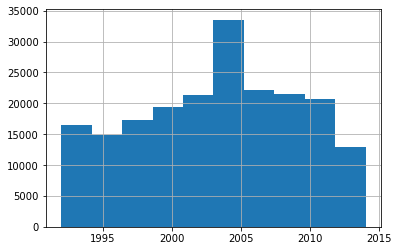

In [6]:
ns.PublicationYear.hist()

<AxesSubplot:xlabel='Count', ylabel='PublicationYear'>

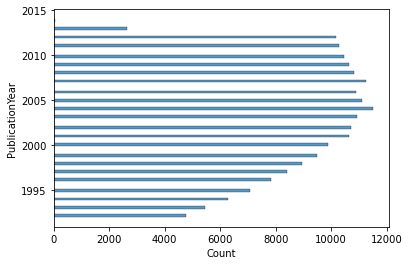

In [38]:
sns.histplot(data=ns, y="PublicationYear")


In [7]:
## example of a descriptor name
ns.MeSHDescriptorName[0]

['Animals',
 'Bone Morphogenetic Protein 4',
 'Bone Morphogenetic Proteins',
 'Cell Lineage',
 'Chick Embryo',
 'DNA-Binding Proteins',
 'Ectoderm',
 'Embryonic Induction',
 'In Situ Hybridization',
 'Kidney Tubules',
 'Mesoderm',
 'PAX2 Transcription Factor',
 'RNA, Messenger',
 'Repressor Proteins',
 'Signal Transduction',
 'Transcription Factors']

In [8]:
### Divide the dataset into 80% and 20%
import pandas as pd
train_part_80 = ns.sample(frac=0.8, random_state = 1234)
test_part_20 = ns.drop(train_part_80.index)
print(f"training dataset: {train_part_80.shape}")
print(f"testing dataset: {test_part_20.shape}")

training dataset: (160201, 7)
testing dataset: (40050, 7)


In [9]:
train_part_80.head()

,PMID,Title,Journal,Abstract,PublicationYear,MeSHDescriptorName,MeSHQualifierName
35298,12135884,Bone morphogenetic protein receptor type II is...,Biol. Reprod.,Growth differentiation factor-9 (GDF-9) is a g...,2002,"[Amino Acid Sequence, Animals, Bone Morphogene...","[None, None, None, None, None, metabolism, Non..."
136306,21430226,Mice with disrupted type I protein kinase A an...,J. Immunol.,Type I protein kinase A (PKA) is targeted to t...,2011,"[A Kinase Anchor Proteins, Animals, Blotting, ...","[immunology, None, None, None, immunology, Non..."
193216,9582369,Overexpression of manganese superoxide dismuta...,J. Biol. Chem.,Several recently identified intracellular prot...,1998,"[Apoptosis, Base Sequence, Humans, NF-kappa B,...","[drug effects, None, None, antagonists & inhib..."
134263,21238461,The structural and dynamic response of MAGI-1 ...,J. Mol. Biol.,PDZ domains are protein interaction domains th...,2011,"[Amino Acid Sequence, Cell Adhesion Molecules,...","[None, chemistry, None, None, None, None, chem..."
62190,15322248,YC-1-induced cyclooxygenase-2 expression is me...,Mol. Pharmacol.,We demonstrated previously that 3-(5'-hydroxym...,2004,"[Cyclic GMP, Cyclic GMP-Dependent Protein Kina...","[analogs & derivatives, metabolism, None, meta..."


<AxesSubplot:>

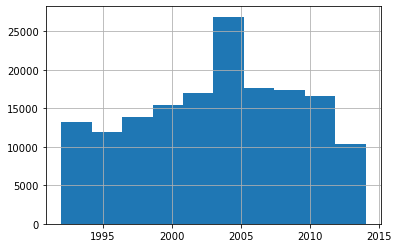

In [10]:
train_part_80.PublicationYear.hist()

In [11]:
print(train_part_80.Journal.unique())
print(len(train_part_80.Journal.unique()))

['Biol. Reprod.' 'J. Immunol.' 'J. Biol. Chem.' 'J. Mol. Biol.'
 'Mol. Pharmacol.' 'Mol. Cell. Biochem.' 'Dev. Cell'
 'Int. J. Biochem. Cell Biol.' 'Am. J. Respir. Cell Mol. Biol.' 'Nature'
 'Mol. Biol. Cell' 'Gastroenterology' 'Cancer Res.' 'Genes Dev.'
 'Biochemistry' 'Dev. Dyn.' 'FASEB J.' 'Dev. Biol.' 'Science' 'FEBS Lett.'
 'Neuron' 'J. Steroid Biochem. Mol. Biol.' 'Mol. Cell. Endocrinol.'
 'Cardiovasc. Res.' 'Mol. Cells' 'Blood' 'Biochem. Biophys. Res. Commun.'
 'Mol. Cell. Biol.' 'J. Mol. Cell. Cardiol.' 'J. Clin. Invest.'
 'Nucleic Acids Res.' 'J. Neurochem.' 'Oncogene' 'Hum. Mol. Genet.'
 'J. Leukoc. Biol.' 'J. Cell Biol.' 'J. Virol.' 'EMBO J.' 'FEBS J.'
 'Proc. Natl. Acad. Sci. U.S.A.' 'Eur. J. Immunol.'
 'Arch. Biochem. Biophys.' 'Dev. Genes Evol.'
 'Am. J. Physiol. Lung Cell Mol. Physiol.' 'Endocrinology'
 'Cell Growth Differ.' 'Int. J. Cancer' 'Genomics' 'Cell' 'J. Neurosci.'
 'J. Clin. Endocrinol. Metab.' 'Genetics' 'BMC Genomics' 'Hepatology'
 'Gene' 'Circ. Res.' 'J. Bio

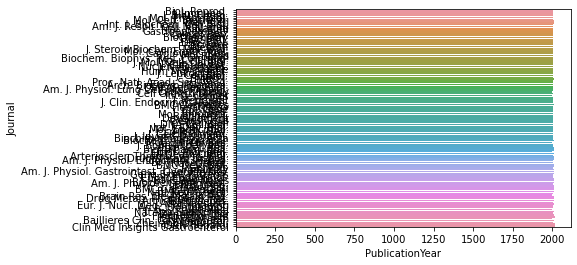

In [53]:
sns.barplot(x="PublicationYear", y="Journal", data=train_part_80, ci=None);


In [12]:
print(test_part_20.Journal.unique())
print(len(test_part_20.Journal.unique()))

['Development' 'J. Clin. Endocrinol. Metab.' 'J. Cell. Biochem.' 'EMBO J.'
 'Mol. Cell. Biol.' 'Dev. Genes Evol.' 'Gene' 'Oncogene' 'Science'
 'J. Mol. Biol.' 'J. Biol. Chem.' 'Biochemistry' 'Br. J. Haematol.'
 'J. Bone Miner. Res.' 'Cancer Res.' 'J. Steroid Biochem. Mol. Biol.'
 'Genomics' 'FEBS Lett.' 'Biochem. Pharmacol.' 'J. Cell Biol.'
 'J. Cell. Physiol.' 'Genes Dev.' 'Dev. Biol.'
 'Biochem. Biophys. Res. Commun.' 'Genetics' 'J. Biochem.' 'Biochem. J.'
 'Hepatology' 'Mol. Pharmacol.' 'Proc. Natl. Acad. Sci. U.S.A.' 'Cell'
 'FASEB J.' 'Exp. Cell Res.' 'Circ. Res.' 'Endocrinology' 'Nature'
 'Arch. Biochem. Biophys.' 'Blood' 'Am. J. Physiol.' 'Immunity'
 'Hum. Mol. Genet.' 'J. Immunol.' 'J. Mol. Cell. Cardiol.' 'Mech. Dev.'
 'DNA Cell Biol.' 'J. Virol.' 'Int. J. Cancer' 'J. Exp. Med.'
 'Nucleic Acids Res.' 'Biochim. Biophys. Acta' 'Mol. Endocrinol.'
 'Mol. Cell' 'J. Clin. Invest.' 'Nat. Genet.' 'J. Leukoc. Biol.'
 'J. Neurosci.' 'Eur. J. Biochem.' 'Eur. J. Immunol.'
 'Mol. Cell. Bio

<AxesSubplot:>

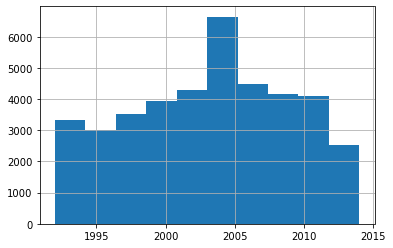

In [13]:
test_part_20.PublicationYear.hist()

In [14]:
train_part_80.MeSHDescriptorName[2]

['Amino Acid Sequence',
 'Animals',
 'Antigens, Differentiation',
 'Biological Evolution',
 'Body Patterning',
 'Cloning, Molecular',
 'Crustacea',
 'DNA-Binding Proteins',
 'Drosophila Proteins',
 'Extremities',
 'Genes, Homeobox',
 'Homeodomain Proteins',
 'Insect Proteins',
 'Insecta',
 'Molecular Sequence Data',
 'Nuclear Proteins',
 'Sequence Analysis, DNA',
 'Sequence Homology, Amino Acid',
 'Tissue Distribution',
 'Transcription Factors']

In [15]:
%%time
ls = []
for i in range(train_part_80.shape[0]):
    ls.extend(train_part_80.iloc[i].MeSHDescriptorName)

CPU times: user 14.8 s, sys: 135 ms, total: 15 s
Wall time: 15.2 s


In [16]:
%%time
## total count of unique MeSHDescriptorName from whole Training dataset 

len(set(ls))

CPU times: user 355 ms, sys: 5.98 ms, total: 361 ms
Wall time: 362 ms


15962

In [17]:
ls[:10]

['Amino Acid Sequence',
 'Animals',
 'Bone Morphogenetic Protein 15',
 'Bone Morphogenetic Protein Receptors, Type II',
 'Cells, Cultured',
 'Extracellular Space',
 'Female',
 'Genome, Human',
 'Granulosa Cells',
 'Growth Differentiation Factor 9']

### Word cloud

In [40]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
type(ls)

list

In [45]:
string_ls = ' '.join(ls)

In [46]:
## get all the MeSH Descriptor Names terms
meshdescriptor_wordcloud = WordCloud().generate(string_ls)

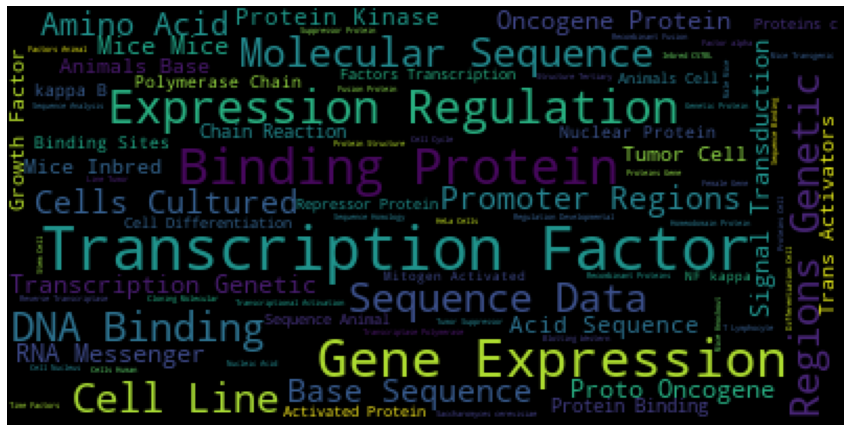

In [50]:
plt.figure(figsize=(15,8))
plt.imshow(meshdescriptor_wordcloud)
plt.axis("off")
plt.savefig("word"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [18]:
import numpy as np
uniques, counts = np.unique(ls, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(ls)))

In [19]:
import operator

sorted_MeSH_percentage = dict(sorted(percentages.items(), key = operator.itemgetter(1),reverse=True))

In [21]:
sum(percentages.values())

100.00000000000217

In [22]:
#perc = [i for i in sorted_MeSH_percentage.values()]
sorted_MeSH_percentage_df = pd.DataFrame(list(sorted_MeSH_percentage.items()),columns = ['MeSHDescriptorName','perc'])
sorted_MeSH_percentage_df.head(20)

,MeSHDescriptorName,perc
0,Animals,3.531916
1,Humans,2.921587
2,Mice,2.032634
3,Transcription Factors,1.673450
4,Molecular Sequence Data,1.459996
5,DNA-Binding Proteins,1.360502
6,"Promoter Regions, Genetic",1.277071
7,Base Sequence,1.246294
8,"Transcription, Genetic",1.122299
9,"RNA, Messenger",0.953663


In [23]:
## Sum top 10
#sorted_MeSH_percentage_df.iloc[10]['perc'].sum()
print(f"for top 10: {round(sorted_MeSH_percentage_df.iloc[1:10].perc.sum(),2)} %")

for top 10: 14.05 %


In [24]:
## Sum top 20
sorted_MeSH_percentage_df.iloc[20]['perc'].sum()
print(f"for top 20: {round(sorted_MeSH_percentage_df.iloc[1:20]['perc'].sum(),2)} %")

for top 20: 21.64 %


#### Finalize top 20 labels

In [25]:
top_20_labels = []

for i in range(20):
    top_20_labels.append(sorted_MeSH_percentage_df.iloc[i]['MeSHDescriptorName'])

In [26]:
top_20_labels

['Animals',
 'Humans',
 'Mice',
 'Transcription Factors',
 'Molecular Sequence Data',
 'DNA-Binding Proteins',
 'Promoter Regions, Genetic',
 'Base Sequence',
 'Transcription, Genetic',
 'RNA, Messenger',
 'Signal Transduction',
 'Cell Line',
 'Gene Expression Regulation',
 'Female',
 'Male',
 'Amino Acid Sequence',
 'Cells, Cultured',
 'Rats',
 'Transfection',
 'Trans-Activators']

#### Finalize top 10 labels

In [27]:
top_10_labels = []

for i in range(10):
    top_10_labels.append(sorted_MeSH_percentage_df.iloc[i]['MeSHDescriptorName'])

In [28]:
top_10_labels

['Animals',
 'Humans',
 'Mice',
 'Transcription Factors',
 'Molecular Sequence Data',
 'DNA-Binding Proteins',
 'Promoter Regions, Genetic',
 'Base Sequence',
 'Transcription, Genetic',
 'RNA, Messenger']

In [29]:
#train_part_80 = train_part_80.iloc[: , :-1]

In [30]:
def create_class(df, label_ls, name_suffix):
    df['class_'+str(name_suffix)] = \
            df.apply(lambda row: list(set(row['MeSHDescriptorName']).intersection(set(label_ls))) , axis = 1)

In [31]:
create_class(train_part_80, top_20_labels, '20_labels')

In [32]:
### Create labels for train and test dataset

## top 20
create_class(train_part_80, top_20_labels, '20_labels')
create_class(test_part_20, top_20_labels, '20_labels')

## top 10

create_class(train_part_80, top_10_labels, '10_labels')
create_class(test_part_20, top_10_labels, '10_labels')

In [33]:
train_part_80.head()

,PMID,Title,Journal,Abstract,PublicationYear,MeSHDescriptorName,MeSHQualifierName,class_20_labels,class_10_labels
35298,12135884,Bone morphogenetic protein receptor type II is...,Biol. Reprod.,Growth differentiation factor-9 (GDF-9) is a g...,2002,"[Amino Acid Sequence, Animals, Bone Morphogene...","[None, None, None, None, None, metabolism, Non...","[Cells, Cultured, Amino Acid Sequence, Animals...","[Animals, Molecular Sequence Data, Humans]"
136306,21430226,Mice with disrupted type I protein kinase A an...,J. Immunol.,Type I protein kinase A (PKA) is targeted to t...,2011,"[A Kinase Anchor Proteins, Animals, Blotting, ...","[immunology, None, None, None, immunology, Non...","[Animals, Male, Mice, Signal Transduction, Hum...","[Animals, Mice, Humans]"
193216,9582369,Overexpression of manganese superoxide dismuta...,J. Biol. Chem.,Several recently identified intracellular prot...,1998,"[Apoptosis, Base Sequence, Humans, NF-kappa B,...","[drug effects, None, None, antagonists & inhib...","[Base Sequence, Signal Transduction, Humans]","[Base Sequence, Humans]"
134263,21238461,The structural and dynamic response of MAGI-1 ...,J. Mol. Biol.,PDZ domains are protein interaction domains th...,2011,"[Amino Acid Sequence, Cell Adhesion Molecules,...","[None, chemistry, None, None, None, None, chem...","[Amino Acid Sequence, Molecular Sequence Data,...","[Molecular Sequence Data, Humans]"
62190,15322248,YC-1-induced cyclooxygenase-2 expression is me...,Mol. Pharmacol.,We demonstrated previously that 3-(5'-hydroxym...,2004,"[Cyclic GMP, Cyclic GMP-Dependent Protein Kina...","[analogs & derivatives, metabolism, None, meta...","[Transcription Factors, Humans]","[Transcription Factors, Humans]"


In [34]:
test_part_20.head()

,PMID,Title,Journal,Abstract,PublicationYear,MeSHDescriptorName,MeSHQualifierName,class_20_labels,class_10_labels
1,10021331,Separation of shoot and floral identity in Ara...,Development,The overall morphology of an Arabidopsis plant...,1999,"[Arabidopsis, Arabidopsis Proteins, Cell Diffe...","[cytology, None, None, biosynthesis, None, Non...","[DNA-Binding Proteins, Transcription Factors]","[DNA-Binding Proteins, Transcription Factors]"
3,10021333,Apontic binds the translational repressor Brun...,Development,The product of the oskar gene directs posterio...,1999,"[3' Untranslated Regions, Animals, Cell Compar...","[metabolism, None, None, None, genetics, None,...","[RNA, Messenger, Animals, Transcription Factor...","[RNA, Messenger, Transcription Factors, DNA-Bi..."
5,10021336,Inhibition of in vitro enteric neuronal develo...,Development,The terminal colon is aganglionic in mice lack...,1999,"[Animals, Cell Adhesion, Cell Differentiation,...","[None, None, None, None, embryology, pharmacol...","[Animals, Mice]","[Animals, Mice]"
6,10021337,The Drosophila kismet gene is related to chrom...,Development,The Drosophila kismet gene was identified in a...,1999,"[Amino Acid Sequence, Animals, Bacterial Prote...","[None, None, None, genetics, None, physiology,...","[Transcription, Genetic, Amino Acid Sequence, ...","[Transcription Factors, Transcription, Genetic..."
7,10021338,FGF8 induces formation of an ectopic isthmic o...,Development,Beads containing recombinant FGF8 (FGF8-beads)...,1999,"[Animals, Body Patterning, Brain Stem, Cerebel...","[None, drug effects, drug effects, drug effect...","[Trans-Activators, Animals]",[Animals]


In [51]:
#train_part_80.to_parquet('PubMed_MeSH_train_part_80.parquet')

In [52]:
#test_part_20.to_parquet('PubMed_MeSH_test_part_20.parquet')